In [226]:
import matplotlib.pyplot as plt
import numpy as np

In [227]:
import os
# Save all the file names in the path as strings to a list
path="/Users/ecasiano/Desktop/PrototypeScripts/ManySeeds/TestSystematicError/"
filenames_all = os.listdir(path)

# Set desired total number of particles
L_want = 4
N_want = 4
l_want = 2
beta_want = 4.000000
bins_want = 1000
D_want = 1
U_want = 3.300000
t_want = 1.000000

# Saves the files relevant to P(n) & S2(n) calculation
files_PnSquared = []
files_SWAPn = []
files_Pn = []

# Iterate over all filenames in path
for filename in filenames_all:
    
    # Extract parameter information from file name
    parameters = filename.split("_")
    
    if parameters[0]=='1D' or parameters[0]=='2D' or parameters[0]=='3D':
    
        D = int((parameters[0])[0]) # hypercube dimension
        L = int(parameters[1]) # hypercube linear size
        N = int(parameters[2]) # total particles
        l = int(parameters[3]) # subsystem linear size (actually l_max)
        U = float(parameters[4]) # interaction potential
        t = float(parameters[5]) # tunneling parameter
        beta = float(parameters[6]) # imaginary time length (K_B*T)**(-1)
        bin_size = int(parameters[7])
        bins_wanted = int(parameters[8]) # number of bins saved in file
        filetype = (parameters[9]).split("-mA") # identifies the data stored in file
        seed = int(parameters[10].split(".")[0]) # random seed used
        
        mA_sector_wanted = 2
        
        if filetype[0]=='PnSquared' and int(filetype[1])==mA_sector_wanted:
            
            # Set parameters of simulations from differenet seeds we want to evaluate [D,L,N,l,U,t,beta,bins,type]
            parameters_to_evaluate = [D_want,
                                      L_want,
                                      N_want,
                                      l_want,
                                      U_want,
                                      t_want,
                                      beta_want,
                                      bins_want,
                                      'PnSquared']

            if [D,L,N,l,U,t,beta,bins_wanted,filetype[0]] == parameters_to_evaluate:
                if os.stat(path+filename).st_size > 0:
                    with open(path+filename) as f:
                       count = sum(1 for _ in f)
                    if count == bins_wanted: # only consider files that managed to save number of bins wanted
                        files_PnSquared.append(filename)
                        
                        filename_splitted = filename.split('_')
                        filename_splitted[9] = 'Pn-mA'+str(mA_sector_wanted)
                        filename_Pn = "_".join(filename_splitted)
                        files_Pn.append(filename_Pn)
                        
                        filename_splitted = filename.split('_')
                        filename_splitted[9] = 'SWAPn-mA'+str(mA_sector_wanted) # change the file type
#                         print(filename_splitted)
                        filename_SWAPn = "_".join(filename_splitted)
                        files_SWAPn.append(filename_SWAPn)
                        
# Get total number of seeds 
number_of_seeds = len(files_PnSquared)

In [228]:
files_SWAPn[:10],files_PnSquared[:10]

(['1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_SWAPn-mA2_679.dat',
  '1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_SWAPn-mA2_123.dat',
  '1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_SWAPn-mA2_645.dat',
  '1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_SWAPn-mA2_889.dat',
  '1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_SWAPn-mA2_651.dat',
  '1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_SWAPn-mA2_137.dat',
  '1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_SWAPn-mA2_862.dat',
  '1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_SWAPn-mA2_876.dat',
  '1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_SWAPn-mA2_686.dat',
  '1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_SWAPn-mA2_692.dat'],
 ['1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_PnSquared-mA2_679.dat',
  '1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_PnSquared-mA2_123.dat',
  '1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_PnSquared-mA2_645.dat',
  '1D_4_4_2_3.300000_1.000000_4.000000_10000_1000_PnSquared-mA2_889.dat',
  '

### Jacknife notes

In [229]:
# # SWAP_col_sums = np.zeros((number_of_seeds,N_want+1))
# # Pn_squared_l_col_sums = np.zeros((number_of_seeds,N_want+1))
# S2n_seeds = np.zeros((number_of_seeds,N+1))
# S2n_seeds_err = np.zeros((number_of_seeds+1))
# for s in range(number_of_seeds):
#     data_SWAPn = np.loadtxt(path+files_SWAPn[s])
#     SWAP_col_sums = np.sum(data_SWAPn,axis=0)
    
#     data_PnSquared = np.loadtxt(path+files_PnSquared[s])
#     Pn_squared_l_col_sums = np.sum(data_PnSquared,axis=0)
    
#     S2n_i = np.zeros(data_SWAPn.shape)
#     for i in range(data_SWAPn.shape[0]):
#         jacknifed_SWAPn = SWAP_col_sums - data_SWAPn[i]
#         jacknifed_PnSquared = Pn_squared_l_col_sums - data_PnSquared[i]
        
#         S2n_i[i] = -np.log(jacknifed_SWAPn/jacknifed_PnSquared)
    
#     S2n = np.mean(S2n_i,axis=0)
#     N_rows = S2n.shape[0]
#     S2n_err = np.std(S2n,axis=0)
#     S2n_err *= np.sqrt(N_rows-1)
    
#     S2n_seeds[s] = S2n
#     S2n_seeds_err[s] = S2n_err

In [230]:
number_of_seeds

1000

### Get mean of numerators and denominators for each seed

In [261]:
SWAPn = np.zeros((number_of_seeds,N+1))
PnSquared = np.zeros((number_of_seeds,N+1))
for s in range(number_of_seeds):
    data_SWAPn = np.loadtxt(path+files_SWAPn[s])
    SWAP_col_mean = np.sum(data_SWAPn[-500:],axis=0)

    data_PnSquared = np.loadtxt(path+files_PnSquared[s])
    Pn_squared_l_col_mean = np.sum(data_PnSquared[-500:],axis=0)
    
    SWAPn[s] = SWAP_col_mean
    PnSquared[s] = Pn_squared_l_col_mean

In [272]:
print(np.sum(SWAPn,axis=0)[0])
print(np.sum(PnSquared,axis=0)[0])
print(np.sum(SWAPn,axis=0)[0]/np.sum(PnSquared,axis=0)[0])
print("")
print(np.sum(SWAPn,axis=0)[N])
print(np.sum(PnSquared,axis=0)[N])
print(np.sum(SWAPn,axis=0)[N]/np.sum(PnSquared,axis=0)[N])

print("\n",np.sum(PnSquared,axis=0)[0]/np.sum(PnSquared,axis=0)[N])

243401.0
243272.0
1.0005302706435595

235182.0
244324.0
0.9625824724546095

 0.9956942420720027


### Plot $S_2(n)$ as function of seed

In [263]:
bins=np.linspace(0,2100,10,dtype=int)
bins

array([   0,  233,  466,  700,  933, 1166, 1400, 1633, 1866, 2100])

In [264]:
SWAPn_hist = []
num_bins = 7
SWAPn_hist.append(np.histogram(SWAPn[:,0],bins=bins,density=False))
SWAPn_hist.append(np.histogram(SWAPn[:,N],bins=bins,density=False))
SWAPn_hist.append(np.histogram(PnSquared[:,0],bins=bins,density=False))
SWAPn_hist.append(np.histogram(PnSquared[:,N],bins=bins,density=False))

In [265]:
# bin_min = SWAPn_hist[0][1][0]
# bin_max = SWAPn_hist[0][1][0]
# for i in range(len(SWAPn_hist)):
#     for j,bins in enumerate(SWAPn_hist[i][1]):
#         if np.min(bins) < bin_min: bin_min = np.min(bins)
#         if np.max(bins) > bin_max: bin_max = np.max(bins)
# bin_min,bin_max

In [266]:
# bins = np.linspace(bin_min,bin_max,num_bins)
# bins

[524 416  57   2   1   0   0   0   0]
[618 260  78  30   9   4   1   0   0]
[521 421  55   2   1   0   0   0   0]
[594 277  85  32  10   1   1   0   0]


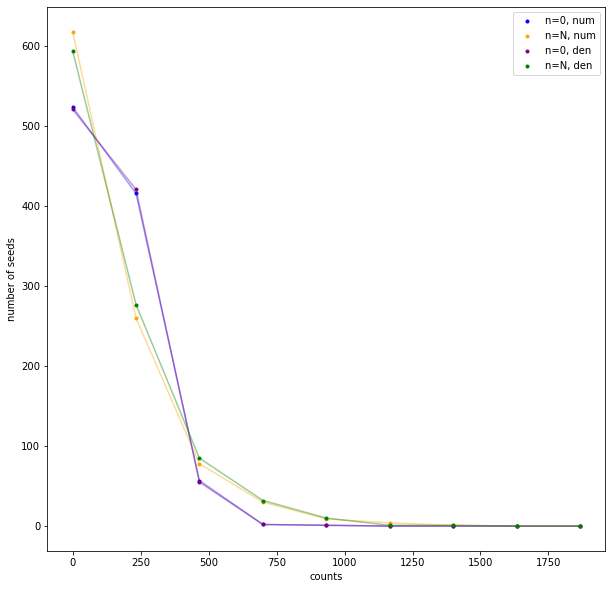

In [267]:
plt.figure(figsize=(10,10))
labels = ['n=0, num','n=N, num','n=0, den','n=N, den']
colors = ['blue','orange','purple','green']

for i,cS in enumerate(SWAPn_hist):
    print(cS[0])
    plt.plot(bins[:-1],cS[0],alpha=0.4,color=colors[i])
    plt.plot(bins[:-1],cS[0],'o',ms=3,color=colors[i],label=labels[i])
    
plt.xlabel('counts')
plt.ylabel('number of seeds')
plt.legend()
plt.savefig('testSystematicErrorHist.png')

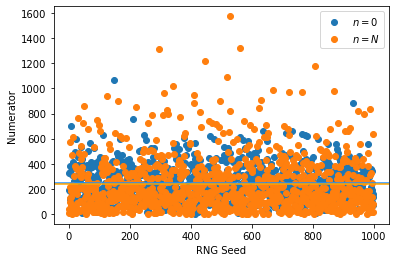

In [268]:
plt.plot(np.arange(number_of_seeds),SWAPn[:,0],'o',label=r'$n=0$')
plt.plot(np.arange(number_of_seeds),SWAPn[:,N],'o',label=r'$n=N$')
plt.axhline(np.mean(SWAPn[:,0]),color='dodgerblue')
plt.axhline(np.mean(SWAPn[:,N]),color='orange')
plt.xlabel('RNG Seed')
plt.ylabel('Numerator')
plt.legend()
plt.savefig('numerators.png')

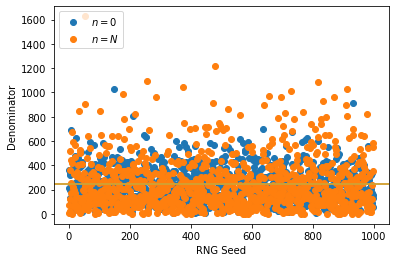

In [269]:
plt.plot(np.arange(number_of_seeds),PnSquared[:,0],'o',label=r'$n=0$')
plt.plot(np.arange(number_of_seeds),PnSquared[:,N],'o',label=r'$n=N$')
plt.axhline(np.mean(PnSquared[:,0]),color='dodgerblue')
plt.axhline(np.mean(PnSquared[:,N]),color='orange')
plt.xlabel('RNG Seed')
plt.ylabel('Denominator')
plt.legend(loc='upper left')
plt.savefig('denominators.png')

In [270]:
for n in range(N+1):
    print(f"<S2(n={n})> = {S2_mean[n]:0.6f} +/- {S2_err[n]:0.6f}")

NameError: name 'S2_mean' is not defined

### $P(n)$

In [223]:
data_Pn_m2 = np.loadtxt(path+"1D_4_4_2_3.300000_1.000000_4.000000_1000_Pn-mA2_"+str(seed)+".dat")
np.mean(data_Pn_m2,axis=0)

OSError: /Users/ecasiano/Desktop/PrototypeScripts/ManySeeds/TestSystematicError/1D_4_4_2_3.300000_1.000000_4.000000_1000_Pn-mA2_106.dat not found.

In [ ]:
data_Pn_col_sum_m2 = np.sum(data_Pn_m2,axis=0)

In [ ]:
jacknifed_Pn = np.zeros(data_Pn_m2.shape)
for i in range(data_Pn_m2.shape[0]):
    data_Pn_col_sum_m2_i = data_Pn_col_sum_m2 - data_Pn_m2[i]
        
    jacknifed_Pn[i] = data_Pn_col_sum_m2_i
jacknifed_Pn /= np.sum(jacknifed_Pn,axis=1)[:,None]

In [ ]:
Pn_mean = np.mean(jacknifed_Pn,axis=0)
Pn_mean /= np.sum(Pn_mean )
N_rows_Pn = jacknifed_Pn.shape[0]
Pn_err = np.std(jacknifed_Pn,axis=0)
Pn_err *= np.sqrt(N_rows_Pn-1)

In [ ]:
for n in range(4+1):
    print(f'P(n={n}) = {Pn_mean[n]:0.4f} +/- {Pn_err[n]:0.4f}')

In [ ]:
x1 = np.geomspace(0.1,2.0, num=7)
print(x1)
x2 = np.arange(3,6,1)
print(x2)
x5 = np.array([0.1,0.20,0.35,0.60,1.0,1.45,2.0,3.0,4.0,5.0,6.0])
# plt.plot(x1,np.exp(-x1),'o')
# plt.plot(x2,np.exp(-x2),'o')
plt.plot(x5,np.exp(-x5),'o')
x5

In [ ]:
x = np.hstack((x1,x2))
x[1]=0.2
x[2]=0.3
x[3]=0.6

In [ ]:
plt.plot(x,np.exp(-x),'o')

In [ ]:
list(enumerate(x3))

In [ ]:
# x3[5] = 1.0
x3[5] = 1.0
x3[7] = 2.0